In [1]:
import os 
import pandas as pd
import numpy as np
from pydub import AudioSegment

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing

/Users/bastienorset/Documents/git/respiratory_sound/.venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
audio_folder = '../../data/ICBHI_final_database'

In [3]:
df_info = pd.read_csv('../../data/info_dataset.csv')

In [8]:
#audio_subject = '222_1b1_Pr_sc_Meditron'  #wheeze example
audio_subject = '107_2b3_Ar_mc_AKGC417L' #crackle example
audio_subject = '124_1b1_Pl_sc_Litt3200'
audio_data_file, audio_event_file = processing.load_file_from_recording_name(audio_folder,audio_subject)
data_filtered = processing.preprocess_data(audio_data_file, audio_event_file)

/Users/bastienorset/Documents/git/respiratory_sound/.venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


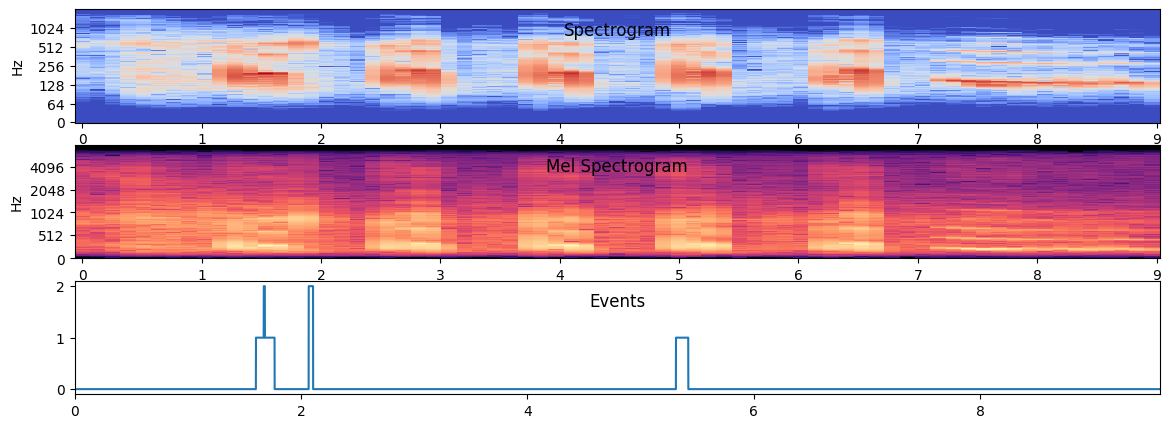

In [9]:
X = librosa.stft(data_filtered['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))
S_dB = librosa.power_to_db(X, ref=np.max)

f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(311)
librosa.display.specshow(Xdb, sr=data_filtered['fs'], x_axis='time', y_axis='log')
ax.set_title('Spectrogram',y=0.7)
ax = f.add_subplot(312)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=data_filtered['fs'],
                          fmax=8000, ax=ax)
ax.set_title('Mel Spectrogram',y=0.7)
ax = f.add_subplot(313)
ax.plot(data_filtered['time'],data_filtered['label'])
ax.set_xlim([data_filtered['time'][0],data_filtered['time'][-1]])
ax.set_title('Events',y=0.7)
ipd.Audio(audio_data_file)

(0.0, 9.584)

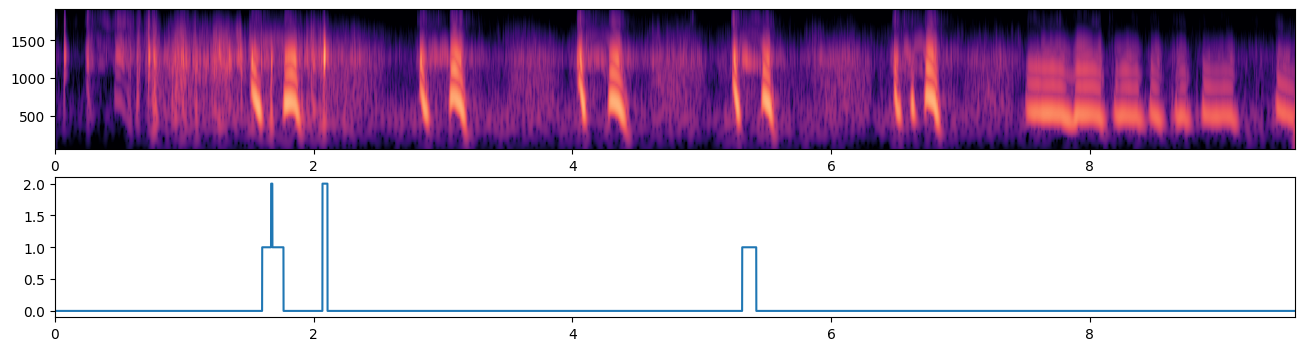

In [10]:
data_wv = processing.apply_wavelets(data_filtered)

DB_RANGE = 100 # dynamic range to show in dB
CMAP = 'magma'

x = 20*data_wv['data']
f = plt.figure(figsize = (16,4))
ax = f.add_subplot(211)
ax.imshow(x, cmap=CMAP, aspect='auto', norm=None, vmax=0, vmin=-100,extent=[data_wv['time'][0],data_wv['time'][-1],data_wv['freq'][0],data_wv['freq'][-1]])
#ax.invert_yaxis()
ax = f.add_subplot(212)
ax.plot(data_wv['time'],data_wv['label'])
ax.set_xlim([data_wv['time'][0],data_wv['time'][-1]])

#wheeze:1
#crackle:2

In [19]:
features = processing.extract_features(data_filtered)

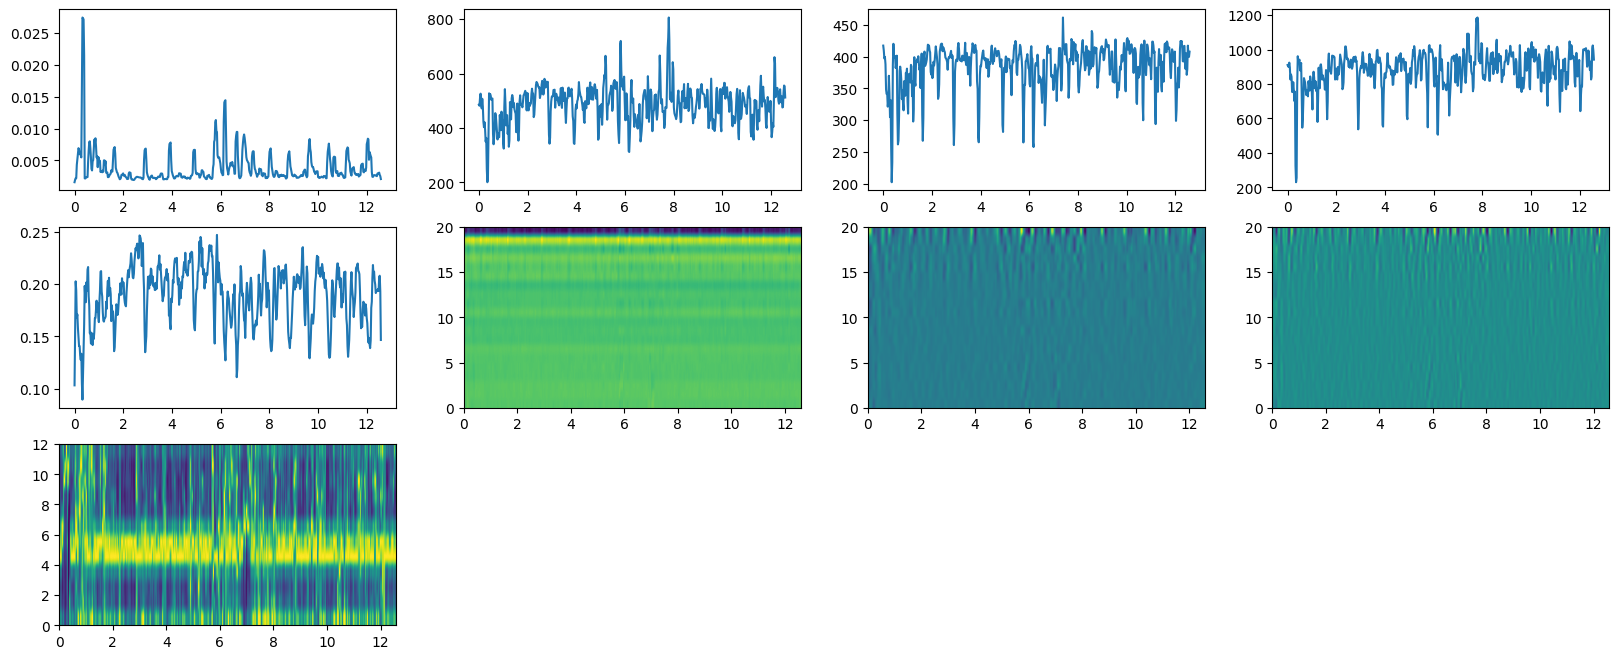

In [8]:
f = plt.figure(figsize=(20, 8))
ax = f.add_subplot(341)
ax.plot(features['time'],features['rmse'].T)
ax = f.add_subplot(342)
ax.plot(features['time'],features['spec_cent'].T)
ax = f.add_subplot(343)
ax.plot(features['time'],features['spec_bw'].T)
ax = f.add_subplot(344)
ax.plot(features['time'],features['rolloff'].T)
ax = f.add_subplot(345)
ax.plot(features['time'],features['zcr'].T)
ax = f.add_subplot(346)
ax.imshow(features['mfcc'],aspect='auto',extent=[features['time'][0],features['time'][-1],0,features['mfcc'].shape[0]])
ax = f.add_subplot(347)
ax.imshow(features['delta_mfcc'],aspect='auto',extent=[features['time'][0],features['time'][-1],0,features['mfcc'].shape[0]])
ax = f.add_subplot(348)
ax.imshow(features['delta2_mfcc'],aspect='auto',extent=[features['time'][0],features['time'][-1],0,features['mfcc'].shape[0]])
ax = f.add_subplot(349)
ax.imshow(features['chroma_stft'],aspect='auto',extent=[features['time'][0],features['time'][-1],0,features['chroma_stft'].shape[0]])

(0.0, 69.45)

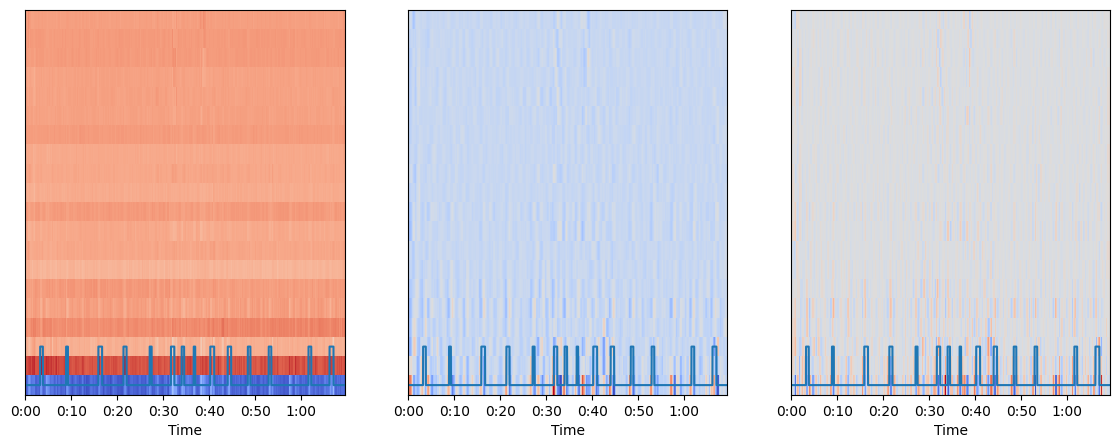

In [9]:
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(131)
ax = librosa.display.specshow(features['mfcc'],x_axis='time',sr =data_filtered['fs'])
plt.plot(data_filtered['time'],data_filtered['label'])
plt.xlim([data_filtered['time'][0],data_filtered['time'][-1]])
ax = f.add_subplot(132)
librosa.display.specshow(features['delta_mfcc'],x_axis='time',sr =data_filtered['fs'])
plt.plot(data_filtered['time'],data_filtered['label'])
plt.xlim([data_filtered['time'][0],data_filtered['time'][-1]])
ax = f.add_subplot(133)
librosa.display.specshow(features['delta2_mfcc'],x_axis='time',sr =data_filtered['fs'])
plt.plot(data_filtered['time'],data_filtered['label'])
plt.xlim([data_filtered['time'][0],data_filtered['time'][-1]])

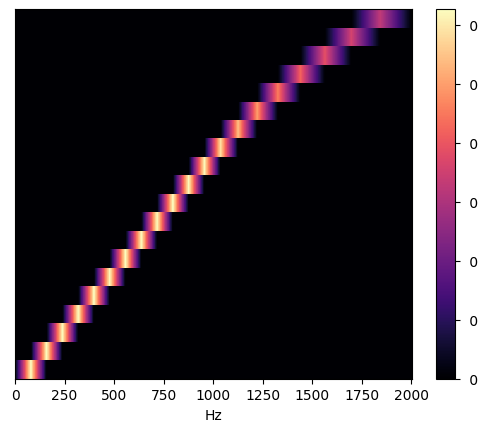

In [10]:
filter_banks = librosa.filters.mel(n_fft=2048,sr=data_filtered['fs'],n_mels=20)
plt.figure()
librosa.display.specshow(filter_banks,sr = data_filtered['fs'],x_axis='linear')
plt.colorbar(format='%2.f')

/var/folders/xx/qddw26dx0174zw4hpmjq3gjh0000gn/T/ipykernel_3823/299013039.py:1: FutureWarning: Pass y=[ 7.88389518e-07  7.88389495e-07  7.88389465e-07 ... -2.25286202e-02
 -7.74171603e-02  9.98705822e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(data_filtered['data'],sr=data_filtered['fs'],n_mels=20)


(0.0, 20.0)

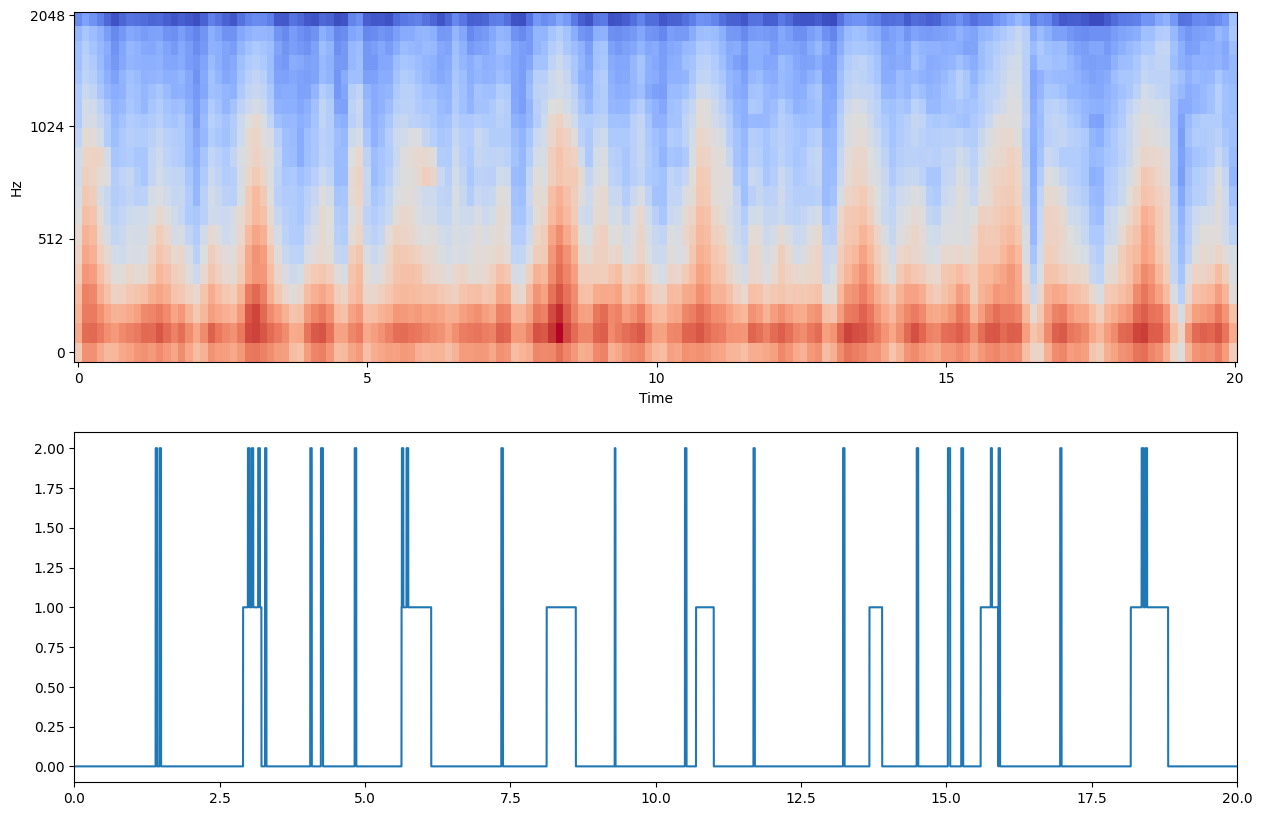

In [7]:
mel_spectrogram = librosa.feature.melspectrogram(data_filtered['data'],sr=data_filtered['fs'],n_mels=20)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(211)
ax = librosa.display.specshow(log_mel_spectrogram,
                         x_axis='time',
                         y_axis='mel',
                         sr=data_filtered['fs'])
ax = f.add_subplot(212)
ax.plot(data_filtered['time'],data_filtered['label'])
ax.set_xlim([data_filtered['time'][0],data_filtered['time'][-1]])
